In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import numpy as np
import matplotlib.gridspec as gridspec

rcount = 30
dcount = 35
small_states = ['Vermont','New Hampshire','New Jersey','Delaware','Rhode Island','Massachusetts','Connecticut']

In [2]:
states = {
    'Alabama':{'Lat':32.806671,'Lon':-86.791130-.5,'EV':9},
    'Alaska':{'Lat':61.370716+1,'Lon':-152.404419,'EV':3},
    'Arizona':{'Lat':33.729759,'Lon':-111.431221-1,'EV':11},
    'Arkansas':{'Lat':34.969704,'Lon':-92.373123-1,'EV':6},
    'California':{'Lat':36.116203,'Lon':-119.681564,'EV':55},
    'Colorado':{'Lat':39.059811-.5,'Lon':-105.311104-1,'EV':9},
    'Connecticut':{'Lat':41.597782,'Lon':-72.755371,'EV':7},
    'Delaware':{'Lat':39.318523,'Lon':-75.507141,'EV':3},
    'District of Columbia':{'Lat':38.897438,'Lon':-77.026817,'EV':3},
    'Florida':{'Lat':27.766279,'Lon':-81.686783-.5,'EV':29},
    'Georgia':{'Lat':33.040619-.5,'Lon':-83.643074-.5,'EV':16},
    'Hawaii':{'Lat':21.094318,'Lon':-157.498337+1,'EV':4},
    'Idaho':{'Lat':44.240459,'Lon':-114.478828-1,'EV':4},
    'Illinois':{'Lat':40.349457-.5,'Lon':-88.986137-1,'EV':20},
    'Indiana':{'Lat':39.849426,'Lon':-86.258278-.5,'EV':11},
    'Iowa':{'Lat':42.011539,'Lon':-93.210526-1, 'EV':6},
    'Kansas':{'Lat':38.526600-0.3,'Lon':-96.726486-2, 'EV':6},
    'Kentucky':{'Lat':37.668140-.5,'Lon':-84.670067-1,'EV':8},
    'Louisiana':{'Lat':31.169546,'Lon':-91.867805-1.5,'EV':8},
    'Maine':{'Lat':44.693947,'Lon':-69.381927-1,'EV':4},
    'Maryland':{'Lat':39.063946,'Lon':-76.802101,'EV':10},
    'Massachusetts':{'Lat':42.230171,'Lon':-71.530106,'EV':11},
    'Michigan':{'Lat':43.326618,'Lon':-84.536095-1,'EV':16},
    'Minnesota':{'Lat':45.694454,'Lon':-93.900192-1.5,'EV':10},
    'Mississippi':{'Lat':32.741646,'Lon':-89.678696-.5,'EV':6},
    'Missouri':{'Lat':38.456085,'Lon':-92.288368-1,'EV':10},
    'Montana':{'Lat':46.921925,'Lon':-110.454353,'EV':3},
    'Nebraska':{'Lat':41.125370,'Lon':-98.268082-2,'EV':5},
    'Nevada':{'Lat':38.313515,'Lon':-117.055374,'EV':6},
    'New Hampshire':{'Lat':43.452492,'Lon':-71.563896,'EV':4},
    'New Jersey':{'Lat':40.298904,'Lon':-74.521011,'EV':14},
    'New Mexico':{'Lat':34.840515-1,'Lon':-106.248482-.5,'EV':5},
    'New York':{'Lat':42.165726+1,'Lon':-74.948051-1,'EV':29},
    'North Carolina':{'Lat':35.630066-0.3,'Lon':-79.806419,'EV':15},
    'North Dakota':{'Lat':47.528912-.3,'Lon':-99.784012-1,'EV':3},
    'Ohio':{'Lat':40.388783-.5,'Lon':-82.764915-1,'EV':18},
    'Oklahoma':{'Lat':35.565342,'Lon':-96.928917-1.5,'EV':7},
    'Oregon':{'Lat':44.572021-1,'Lon':-122.070938,'EV':7},
    'Pennsylvania':{'Lat':40.590752,'Lon':-77.209755-1.5,'EV':20},
    'Rhode Island':{'Lat':41.680893,'Lon':-71.511780,'EV':4},
    'South Carolina':{'Lat':33.856892-0.5,'Lon':-80.945007-0.5,'EV':9},
    'South Dakota':{'Lat':44.299782,'Lon':-99.438828-1,'EV':3},
    'Tennessee':{'Lat':35.747845-.2,'Lon':-86.692345,'EV':11},
    'Texas':{'Lat':31.054487,'Lon':-97.563461-2,'EV':38},
    'Utah':{'Lat':40.150032-1.5,'Lon':-111.862434,'EV':6},
    'Vermont':{'Lat':44.045876,'Lon':-72.710686,'EV':3},
    'Virginia':{'Lat':37.769337-.5,'Lon':-78.169968-.5,'EV':13},
    'Washington':{'Lat':47.400902-.3,'Lon':-121.490494,'EV':12},
    'West Virginia':{'Lat':38.491226-.2,'Lon':-80.954453-.5,'EV':5},
    'Wisconsin':{'Lat':44.268543,'Lon':-89.616508-1,'EV':10},
    'Wyoming':{'Lat':42.755966,'Lon':-107.302490-1,'EV':3}}

In [3]:
states['Alabama']['prediction'] = 'rep'

states['Alaska']['prediction'] = ''

states['Arizona']['prediction'] = ''

states['Arkansas']['prediction'] = 'rep'

states['California']['prediction'] = 'NE'

states['Colorado']['prediction'] = ''

states['Connecticut']['prediction'] = 'NE'

states['Delaware']['prediction'] = 'dem'

states['Florida']['prediction'] = 'NE'

states['Georgia']['prediction'] = ''

states['Hawaii']['prediction'] = 'dem'

states['Idaho']['prediction'] = 'rep'

states['Illinois']['prediction'] = 'dem'

states['Indiana']['prediction'] = 'NE'

states['Iowa']['prediction'] = ''

states['Kansas']['prediction'] = ''

states['Kentucky']['prediction'] = 'rep'

states['Louisiana']['prediction'] = 'rep'

states['Maine']['prediction'] = ''

states['Maryland']['prediction'] = 'NE'

states['Massachusetts']['prediction'] = 'dem'

states['Michigan']['prediction'] = ''

states['Minnesota']['prediction'] = ''

states['Mississippi']['prediction'] = 'rep'

states['Missouri']['prediction'] = 'rep'

states['Montana']['prediction'] = ''

states['Nebraska']['prediction'] = 'rep'

states['Nevada']['prediction'] = 'NE'

states['New Hampshire']['prediction'] = ''

states['New Jersey']['prediction'] = 'dem'

states['New Mexico']['prediction'] = 'dem'

states['New York']['prediction'] = 'NE'

states['North Carolina']['prediction'] = ''

states['North Dakota']['prediction'] = 'rep'

states['Ohio']['prediction'] = 'NE'

states['Oklahoma']['prediction'] = 'rep'

states['Oregon']['prediction'] = 'dem'

states['Pennsylvania']['prediction'] = 'NE'

states['Rhode Island']['prediction'] = 'dem'

states['South Carolina']['prediction'] = ''

states['South Dakota']['prediction'] = 'rep'

states['Tennessee']['prediction'] = 'rep'

states['Texas']['prediction'] = ''

states['Utah']['prediction'] = 'NE'

states['Vermont']['prediction'] = 'dem'

states['Virginia']['prediction'] = 'dem'

states['Washington']['prediction'] = 'NE'

states['District of Columbia']['prediction'] = ''

states['West Virginia']['prediction'] = 'NE'

states['Wisconsin']['prediction'] = 'NE'

states['Wyoming']['prediction'] = 'rep'

GA_special = ''

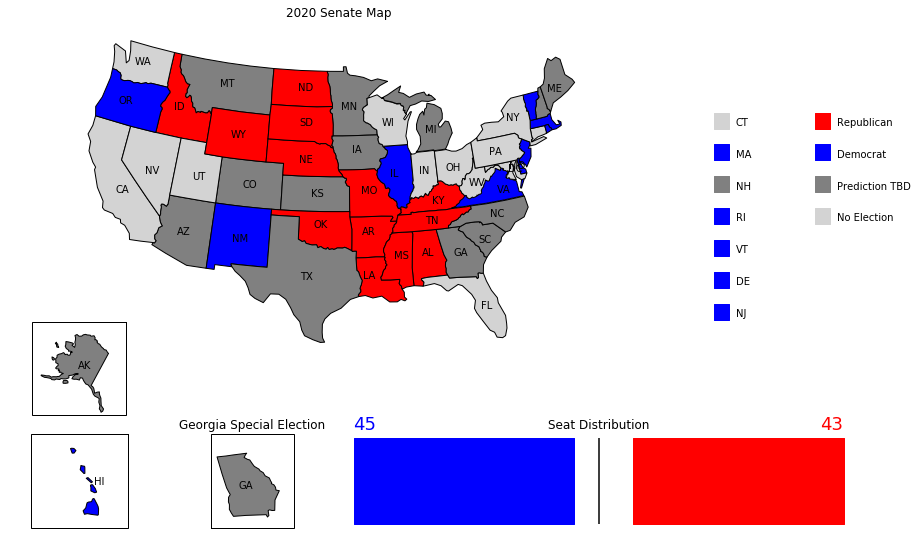

In [4]:
small_y = 9
small_y2 = 9.5
small_label = 9.1
fig = plt.figure(figsize=(15,10))
gs = fig.add_gridspec(5, 5)
ax = fig.add_subplot(gs[0:-1,0:-1], projection=ccrs.LambertConformal())
axak = fig.add_subplot(gs[3,0], projection=ccrs.LambertConformal())
axhi = fig.add_subplot(gs[4,0], projection=ccrs.LambertConformal())
axsmall = fig.add_subplot(gs[1:4,-1])
axcount = fig.add_subplot(gs[4,2:])
axga = fig.add_subplot(gs[4,1], projection=ccrs.LambertConformal())
ax.set_extent([-125, -66.5, 20, 50], ccrs.Geodetic())
axak.set_extent([-170, -130, 54, 72], ccrs.Geodetic())
axhi.set_extent([-160.8,-154.4,18.6,22.7], ccrs.Geodetic())
axga.set_extent([-86,-80,30,35.9])
shapename = 'admin_1_states_provinces_lakes_shp'
states_shp = shpreader.natural_earth(resolution='110m',
                                     category='cultural', name=shapename)

ax.background_patch.set_visible(False)
ax.outline_patch.set_visible(False)

ax.set_title('2020 Senate Map')

axsmall.set_xlim(0,10)
axsmall.set_ylim(0,10)
axsmall.axis('off')

for astate in shpreader.Reader(states_shp).records():
    
    edgecolor = 'black'
    facecolor = ''
    try:
        # use the name of this state to get pop_density
        pick = states[ astate.attributes['name'] ]['prediction']
    except:
        state_dens = 0

    if pick == 'rep':
        facecolor = 'red'
    elif pick == 'dem':
        facecolor = 'blue'
    elif pick == 'NE':
        facecolor = 'lightgray'
    else:
        facecolor = 'gray'
    
    if astate.attributes['name'] == 'Alaska':
        axak.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)
        axak.text(states[astate.attributes['name']]['Lon'], states[astate.attributes['name']]['Lat'],astate.attributes['name_alt'][0:2], horizontalalignment='left', #Adds label at San Diego point
               transform=ccrs.PlateCarree())
    elif astate.attributes['name'] == 'Hawaii':
        axhi.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)
        axhi.text(states[astate.attributes['name']]['Lon'], states[astate.attributes['name']]['Lat'],astate.attributes['name_alt'][0:2], horizontalalignment='left', #Adds label at San Diego point
               transform=ccrs.PlateCarree())
    elif astate.attributes['name'] == 'Georgia':
        axga.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)
        axga.text(states[astate.attributes['name']]['Lon'], states[astate.attributes['name']]['Lat'],astate.attributes['name_alt'][0:2], horizontalalignment='left',
               transform=ccrs.PlateCarree())
    # `astate.geometry` is the polygon to plot
    ax.add_geometries([astate.geometry], ccrs.PlateCarree(),
                      facecolor=facecolor, edgecolor=edgecolor)
    if astate.attributes['name'] not in small_states and astate.attributes['name'] not in ['Hawaii','Alaska','Pennsylvania','Kentucky']:
        ax.text(states[astate.attributes['name']]['Lon'], states[astate.attributes['name']]['Lat'],astate.attributes['name_alt'][0:2], horizontalalignment='left', 
               transform=ccrs.PlateCarree())
    elif astate.attributes['name'] == 'Pennsylvania':
        ax.text(states[astate.attributes['name']]['Lon'], states[astate.attributes['name']]['Lat'],astate.attributes['name_alt'][len(astate.attributes['name_alt'])-2:], horizontalalignment='left', 
               transform=ccrs.PlateCarree())
    elif astate.attributes['name'] == 'Kentucky':
        ax.text(states[astate.attributes['name']]['Lon'], states[astate.attributes['name']]['Lat'],'KY', horizontalalignment='left', 
               transform=ccrs.PlateCarree())
    
    if astate.attributes['name'] in small_states:
        if astate.attributes['name'] == 'Massachusetts':
            axsmall.fill_betweenx((small_y,small_y2),1,2,color=facecolor)
            axsmall.annotate('MA',(2.5,small_label))
        elif astate.attributes['name'] == 'Rhode Island':
            axsmall.fill_betweenx((small_y,small_y2),1,2,color=facecolor)
            axsmall.annotate('RI',(2.5,small_label))
        else:
            axsmall.fill_betweenx((small_y,small_y2),1,2,color=facecolor)
            axsmall.annotate(astate.attributes['name_alt'][0:2],(2.5,small_label))
        small_y -= 1
        small_y2 -= 1
        small_label -= 1
        
for astate in shpreader.Reader(states_shp).records():
    if states[ astate.attributes['name'] ]['prediction'] == 'rep':
        rcount += 1
    elif states[ astate.attributes['name'] ]['prediction'] == 'dem':
        dcount += 1
        
if GA_special == 'dem':
    dcount += 1
elif GA_special == 'rep':
    rcount += 1
axcount.fill_betweenx((0,0.5),0,dcount,color='blue')
axcount.fill_betweenx((0,0.5),100-rcount,100,color='red')
axcount.set_xlim(0,100)
axcount.vlines(50,0,0.5)
axcount.text(0,.55,str(dcount),color='blue',fontsize=18)
axcount.text(95,.55,str(rcount),color='red',fontsize = 18)
axcount.axis('off')
axcount.set_title('Seat Distribution')    
    
axsmall.fill_betweenx((9,9.5),8,9,color='red')
axsmall.annotate('Republican',(9.5,9.1))
axsmall.fill_betweenx((8,8.5),8,9,color='blue')
axsmall.annotate('Democrat',(9.5,8.1))
axsmall.fill_betweenx((7,7.5),8,9,color='gray')
axsmall.annotate('Prediction TBD',(9.5,7.1))
axsmall.fill_betweenx((6,6.5),8,9,color='lightgrey')
axsmall.annotate('No Election',(9.5,6.1))
axga.set_title('Georgia Special Election')
#plt.savefig('2020_Senate_Test')
plt.show()